In [ ]:
#%cd drive/My Drive/Coursework3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget "https://uwoca-my.sharepoint.com/:u:/g/personal/cbravoro_uwo_ca/Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1"

--2021-12-14 03:59:31--  https://uwoca-my.sharepoint.com/:u:/g/personal/cbravoro_uwo_ca/Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1
Resolving uwoca-my.sharepoint.com (uwoca-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to uwoca-my.sharepoint.com (uwoca-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/cbravoro_uwo_ca/Documents/Clases/Western/FM%209528A%20Banking%20Analytics/2021/Coursework%203%20-%20Deep%20Learning/LiDARTiles.tar.gz [following]
--2021-12-14 03:59:32--  https://uwoca-my.sharepoint.com/personal/cbravoro_uwo_ca/Documents/Clases/Western/FM%209528A%20Banking%20Analytics/2021/Coursework%203%20-%20Deep%20Learning/LiDARTiles.tar.gz
Reusing existing connection to uwoca-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 3115530847 (2.9G) [application/x-gzip]
Saving to: ‘Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1’

Ea8hL1Qqz-1DqXPUkFg 100%[=

In [ ]:
!mv /content/Ea8hL1Qqz-1DqXPUkFg3_OkBkT_oOJ5EdvwX1YU_afWF1w?download=1 /content/drive/MyDrive/Coursework3/data.tar.gz

In [ ]:
!tar xvzf /content/drive/MyDrive/Coursework3/data.tar.gz

In [ ]:
import os
len(os.listdir('/content/LIDAR'))

47360

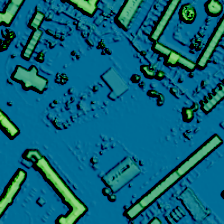

In [ ]:
from IPython.display import Image
Image(filename='LIDAR/LIDAR_38312.png')

Read the data on image description

In [ ]:
import pandas as pd
labels = pd.read_csv('/content/drive/MyDrive/Coursework3/EmbeddingData_C3_9528.csv')

In [ ]:
labels.head()

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,income,employment,education,health,crime,barriers,living_environment
0,48552,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902
1,46571,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902
2,21161,E01000487,Brent 006E,7b,Young ethnic communities,E02000098,Brent 006,E09000005,Brent,4a1r,Ethnically Diverse Metropolitan Living,0.123,0.068,7.192,-0.782,0.109,40.432,21.233
3,26188,E01004572,Wandsworth 016A,6a,Inner city cosmopolitan,E02000938,Wandsworth 016,E09000032,Wandsworth,5a1r,London Cosmopolitan,0.142,0.090,8.750,-0.328,1.062,35.035,21.583
4,46276,E01033320,Lewisham 017E,6a,Inner city cosmopolitan,E02000669,Lewisham 017,E09000023,Lewisham,4a1r,Ethnically Diverse Metropolitan Living,0.125,0.105,7.185,-0.143,0.133,32.410,38.222


In [ ]:
#"LIDAR_%d" % 36418 + ".png%d"
"LIDAR_" + str(36418) + ".png"

'LIDAR_36418.png'

In [ ]:
def name_con(id):
  name = "LIDAR_" + str(id) + ".png"
  return name

In [ ]:
labels['name'] = labels.apply(lambda x : name_con(x.id), axis = 1)

In [ ]:
labels.head()

,id,LSOA11CD,LSOA11NM,SOAC11CD,SOAC11NM,MSOA11CD,MSOA11NM,LAD17CD,LAD17NM,LACCD,LACNM,income,employment,education,health,crime,barriers,living_environment,name
0,48552,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902,LIDAR_48552.png
1,46571,E01000759,Bromley 034A,8a,Affluent communities,E02000160,Bromley 034,E09000006,Bromley,1a1r,Rural-Urban Fringe,0.025,0.042,7.632,-1.345,-0.139,30.886,13.902,LIDAR_46571.png
2,21161,E01000487,Brent 006E,7b,Young ethnic communities,E02000098,Brent 006,E09000005,Brent,4a1r,Ethnically Diverse Metropolitan Living,0.123,0.068,7.192,-0.782,0.109,40.432,21.233,LIDAR_21161.png
3,26188,E01004572,Wandsworth 016A,6a,Inner city cosmopolitan,E02000938,Wandsworth 016,E09000032,Wandsworth,5a1r,London Cosmopolitan,0.142,0.090,8.750,-0.328,1.062,35.035,21.583,LIDAR_26188.png
4,46276,E01033320,Lewisham 017E,6a,Inner city cosmopolitan,E02000669,Lewisham 017,E09000023,Lewisham,4a1r,Ethnically Diverse Metropolitan Living,0.125,0.105,7.185,-0.143,0.133,32.410,38.222,LIDAR_46276.png


Split into test and train

In [ ]:
# Create a train / test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(labels, 
                               test_size = 0.3,
                               random_state = 251137962)

## VGG16

Necessary imports

In [ ]:
import numpy as np
import h5py as h5py
import PIL

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
model = VGG16(weights = 'imagenet',      # The weights from the ImageNet competition
              include_top = False,       # Do not include the top layer, which classifies.
              input_shape= (224, 224, 3) # Input shape. Three channels, and BGR (NOT RGB!!!)
             )

58900480/58889256 [==============================] - 1s 0us/step


Checking details of the model

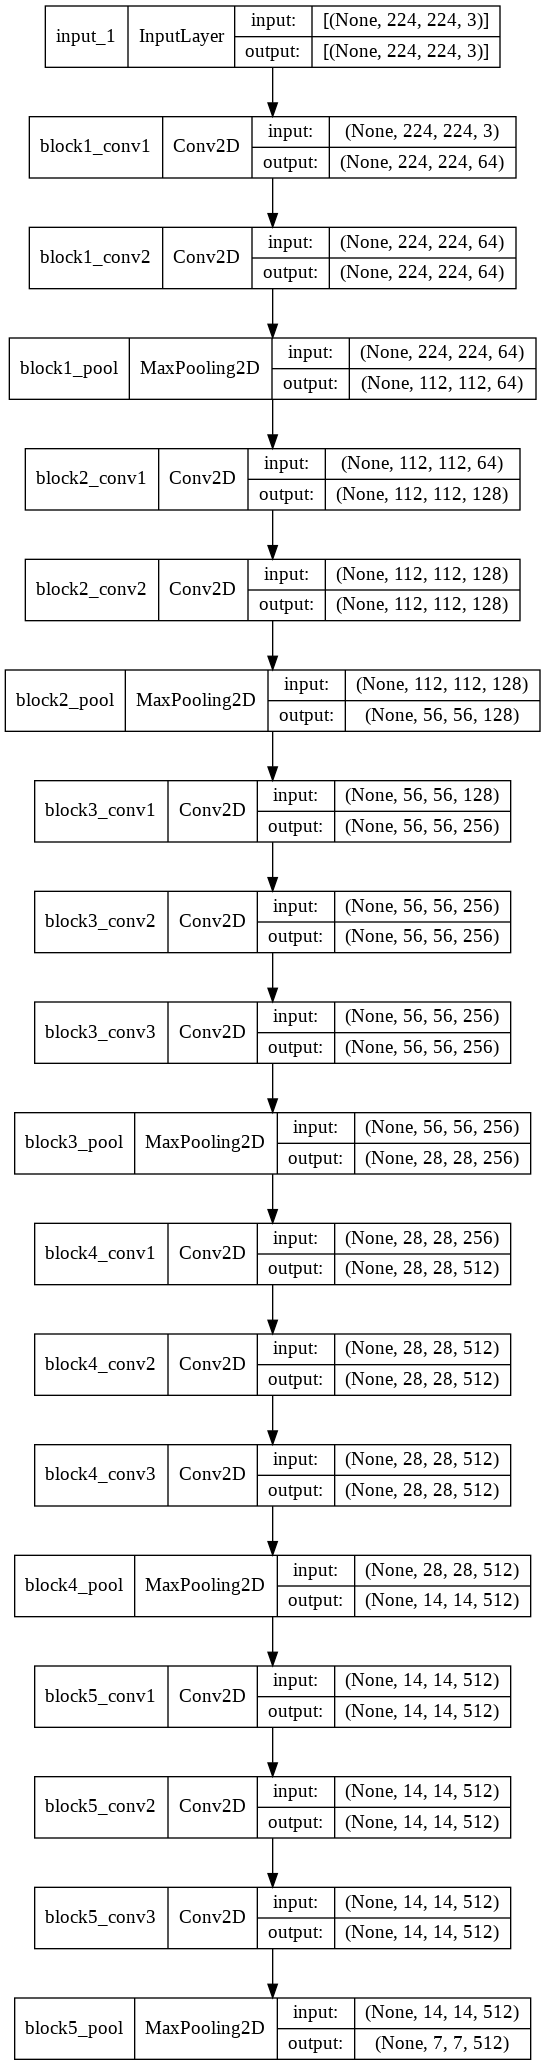

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, show_shapes=True, show_layer_names=True, to_file='GraphModel.png')
Image(retina=True, filename='GraphModel.png')

Create a new model with not all the layers as trainable

In [ ]:
# Create new model
CBModel = Sequential()

# Copy the layers to our new model. This needs to be done as there is a bug in Keras.
for layer in model.layers:
    CBModel.add(layer)

# Set the layers as untrainable
for layer in CBModel.layers:
    layer.trainable = False

In [ ]:
CBModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Setting layers as trainable

In [ ]:
# Set layer as trainable.
CBModel.layers[15].trainable = True
CBModel.layers[16].trainable = True

In [ ]:
# We now add the new layers for prediction.
CBModel.add(Flatten(input_shape=model.output_shape[1:]))
CBModel.add(Dense(64, activation = 'relu'))
CBModel.add(Dropout(0.5))
CBModel.add(Dense(64, activation = 'relu'))
CBModel.add(Dropout(0.5))
CBModel.add(Dense(1, activation = 'linear'))

In [ ]:
CBModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
# Compiling the model!
import tensorflow.keras as keras
CBModel.compile(loss='mse', 
              optimizer=optimizers.Adam(learning_rate=0.000001),
              metrics=[keras.metrics.mean_squared_error, keras.losses.MeanAbsolutePercentageError()]
              )

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-2c861cd7-4c4e-dbaf-97e2-bff75d3cf92b)


In [ ]:
# prepare data augmentation configuration. One for train, one for test.
train_datagen = ImageDataGenerator(
                                  rescale=1./255,                         # NNets like small inputs. Rescale.
                                  shear_range=0.2,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=True,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=1./255,                       # NNets like small inputs. Rescale.
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                  # Flip horizontally?
                                  vertical_flip=False,                    # Flip vertically?
                                  preprocessing_function=preprocess_input,# VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0                    # No validation cut for test.
                                  )



In [ ]:

# We will use a batch size of 64. Depends on RAM of GPU.
batch_size = 256

# Train data generator. We point to the training directory!
train_data_dir = 'LIDAR'

# VGG requires 224 x 224 images.
(img_height, img_width) = (224, 224)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
                                                    directory = train_data_dir,                      # Where are the pics
                                                    dataframe = train,
                                                    x_col = 'name',
                                                    y_col = 'health',
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'training',                 # What subset to use?
                                                    shuffle = True,             # Shuffle the data?
                                                    interpolation="bilinear",
                                                    #drop_remainder=True
                                                    )

validation_generator = train_datagen.flow_from_dataframe(
                                                    directory = train_data_dir,                      # Where are the pics
                                                    dataframe = train,
                                                    x_col = 'name',
                                                    y_col = 'health',
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'validation',                 # What subset to use?
                                                    shuffle = True,                       # Shuffle the data?
                                                    interpolation="bilinear",
                                                    #drop_remainder=True
                                                    )



Found 20565 validated image filenames.
Found 5141 validated image filenames.


In [ ]:

# Test data generator.
test_data_dir = 'LIDAR'

test_generator = test_datagen.flow_from_dataframe(
                                                    directory = test_data_dir,                      # Where are the pics
                                                    dataframe = test,
                                                    x_col = 'name',
                                                    y_col = 'health',
                                                    target_size=(img_height, img_width), # What size should they be
                                                    batch_size=1,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    #subset = 'validation',                 # What subset to use?
                                                    shuffle = False,                       # Shuffle the data?
                                                    interpolation="bilinear"
                                                    )


Found 11017 validated image filenames.


In [ ]:
import tensorflow.keras as keras
CBModel.compile(loss='mse', 
              optimizer=optimizers.Adam(learning_rate=0.000001),
              metrics=[keras.metrics.mean_squared_error, keras.losses.MeanAbsolutePercentageError()]
              )

In [ ]:
# Number of epochs
epochs = 5

# Train!
CBModel.fit(
            train_generator,
            epochs=epochs,
            validation_data=validation_generator,
            steps_per_epoch = 20565/256, # Usually cases / batch_size
            validation_steps = 5141/256 # Number of validation steps
          )

Epoch 1/5
80/80 [==============================] - 578s 6s/step - loss: 0.5298 - mean_squared_error: 0.5298 - mean_absolute_percentage_error: 42925.6875 - val_loss: 0.4348 - val_mean_squared_error: 0.4348 - val_mean_absolute_percentage_error: 81379.8906
Epoch 2/5
80/80 [==============================] - 428s 5s/step - loss: 0.5314 - mean_squared_error: 0.5314 - mean_absolute_percentage_error: 108712.5078 - val_loss: 0.4373 - val_mean_squared_error: 0.4373 - val_mean_absolute_percentage_error: 18041.0527
Epoch 3/5
80/80 [==============================] - 422s 5s/step - loss: 0.5341 - mean_squared_error: 0.5341 - mean_absolute_percentage_error: 58214.4336 - val_loss: 0.4372 - val_mean_squared_error: 0.4372 - val_mean_absolute_percentage_error: 24660.6172
Epoch 4/5
80/80 [==============================] - 420s 5s/step - loss: 0.5271 - mean_squared_error: 0.5271 - mean_absolute_percentage_error: 59360.4453 - val_loss: 0.4339 - val_mean_squared_error: 0.4339 - val_mean_absolute_percentage_e

Save this model

In [ ]:
# Saving the model
CBModel.save('/content/drive/MyDrive/Coursework3/VGG16_35epochs.h5')

# Loading
#CBModel = keras.models.load_model('/content/drive/MyDrive/Coursework3/VGGCheck/VGG16_35epochs.h5',compile=False)

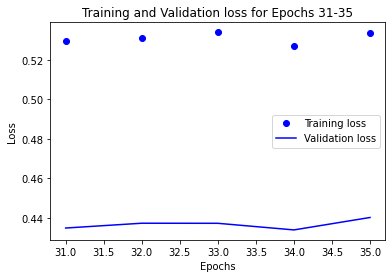

In [ ]:
loss = CBModel.history.history['loss']
val_loss = CBModel.history.history['val_loss']
epochs = (31,32,33,34,35)
#epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss for Epochs 31-35')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Predict the test data using this model

In [ ]:
# Applying to the test set with a generator.
test_generator.reset()

# Get probabilities
output = CBModel.predict(test_generator)

In [ ]:
def mse(y_true, y_pred): 
    return np.square(np.subtract(y_true,y_pred)).mean()

In [ ]:
def mse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = np.mean((y_true - y_pred)**2)
    return mse

In [ ]:
mse1 = mse(test_generator.labels, output)
print('The mean squared error over the test set is %.2f%%' % mse1)

## ResNet50

In [ ]:
import numpy as np
import h5py as h5py
import PIL

# Others
import numpy as np
from sklearn.model_selection import train_test_split

# For AUC estimation and ROC plots
from sklearn.metrics import roc_curve, auc

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Image and directories
import cv2
import os

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow import keras

In [ ]:
# Parameters
ImageSize = (224,224)
BatchSize = 128

In [ ]:
# Import base model. Using ResNet50v2.
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

# Import model with input layer
base_model = ResNet50V2(weights = 'imagenet',     # The weights from the ImageNet competition
                      include_top = False,       # Do not include the top layer, which classifies.
                      input_shape= (224, 224, 3) # Input shape. Three channels.
                      )

94683136/94668760 [==============================] - 2s 0us/step


Read Data

In [ ]:
import pandas as pd
labels = pd.read_csv('/content/drive/MyDrive/Coursework3/EmbeddingData_C3_9528.csv')

In [ ]:
def name_con(id):
  name = "LIDAR_" + str(id) + ".png"
  return name

labels['name'] = labels.apply(lambda x : name_con(x.id), axis = 1)

Split data into train and test

In [ ]:
# Create a train / test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(labels, 
                               test_size = 0.3,
                               random_state = 251137962)

Creating a Full Model for Only the images

In [ ]:
# Create the full model using the Model API

# Input layer
inputs = keras.Input(shape=ImageSize + (3,),
                        name = 'image_only_input')

# Add the ResNet model, setting it to be untrainable. 
# First we store it on a temporary variable.
x = base_model(inputs, training=False)

# Flatten to make it the same size as the original model
x = Flatten()(x)

# Now we actually add it to a layer. Note the way of writing it.
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

# Add final output layer.
outputs = Dense(1, activation='linear')(x)

# Create the complete model object
ImageOnlyModel = keras.Model(inputs, outputs)

In [ ]:
ImageOnlyModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_only_input (InputLaye  [(None, 224, 224, 3)]    0         
 r)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                             

In [ ]:
# Compiling the model! Note the learning rate.
opt = optimizers.Adam(learning_rate=0.000001,            # Learning rate needs to be tweaked for convergence and be small!
                      decay=1e-3 / 200    # Decay of the LR 10^-3 / 1 / 50 / 100 / 200
                      ) 
ImageOnlyModel.compile(loss='mse', # This is NOT a classification problem!
                      optimizer=opt,
                       metrics=[keras.metrics.mean_squared_error, keras.losses.MeanAbsolutePercentageError()]
                       )

In [ ]:
# prepare data augmentation configuration. One for train, one for test.
train_datagen = ImageDataGenerator(
                                  rescale=None,                         # NNets like small inputs. Rescale.
                                  shear_range=0.2,                          # Shear?
                                  zoom_range=0.2,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=True,                     # Flip horizontally?
                                  vertical_flip=False,                      # Flip vertically?
                                  preprocessing_function=preprocess_input,  # VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0.2                    # Create a validation cut?
                                  )

test_datagen = ImageDataGenerator(
                                  rescale=None,                       # NNets like small inputs. Rescale.
                                  shear_range=0,                          # Shear?
                                  zoom_range=0,                           # Zoom? 0.2 means from 80% to 120%
                                  horizontal_flip=False,                  # Flip horizontally?
                                  vertical_flip=False,                    # Flip vertically?
                                  preprocessing_function=preprocess_input,# VGG expects specific input. Set it up with this function that comes prepackaged.
                                  validation_split = 0                    # No validation cut for test.
                                  )



Creating Train, Validation and Test data generators

In [ ]:

# We will use a batch size of 64. Depends on RAM of GPU.
batch_size = 128

# Train data generator. We point to the training directory!
train_data_dir = 'LIDAR'
test_data_dir = 'LIDAR'

# ResNet requires 224 x 224 images.
target_size = (224, 224)

In [ ]:
# Train data generator
train_generator = train_datagen.flow_from_dataframe(
                                                    directory = train_data_dir,                      # Where are the pics
                                                    dataframe = train,
                                                    x_col = 'name',
                                                    y_col = 'health',
                                                    target_size=target_size, # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'training',                 # What subset to use?
                                                    shuffle = True,             # Shuffle the data?
                                                    interpolation="bilinear",
                                                    #drop_remainder=True
                                                    )

# Validation data generator
validation_generator = train_datagen.flow_from_dataframe(
                                                    directory = train_data_dir,                      # Where are the pics
                                                    dataframe = train,
                                                    x_col = 'name',
                                                    y_col = 'health',
                                                    target_size=target_size, # What size should they be
                                                    batch_size=batch_size,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    subset = 'validation',                 # What subset to use?
                                                    shuffle = True,                       # Shuffle the data?
                                                    interpolation="bilinear",
                                                    #drop_remainder=True
                                                    )


# Test data generator
test_generator = test_datagen.flow_from_dataframe(
                                                    directory = test_data_dir,                      # Where are the pics
                                                    dataframe = test,
                                                    x_col = 'name',
                                                    y_col = 'health',
                                                    target_size=target_size, # What size should they be
                                                    batch_size=1,               # Size of batch
                                                    class_mode='raw',            # Class mode, whether 'binary' or 'categorical'
                                                    #subset = 'validation',                 # What subset to use?
                                                    shuffle = False,                       # Shuffle the data?
                                                    interpolation="bilinear"
                                                    )


Found 20565 validated image filenames.
Found 5141 validated image filenames.
Found 11017 validated image filenames.


Train the model

In [ ]:
base_model.trainable = True

# Recompile as we changed things.
ImageOnlyModel.compile(loss='mse', # This is NOT a classification problem!
                      optimizer=opt,
                       metrics=[keras.metrics.mean_squared_error, keras.losses.MeanAbsolutePercentageError()]
                       )

ImageOnlyModel.summary()



Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_only_input (InputLaye  [(None, 224, 224, 3)]    0         
 r)                                                              
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                          

In [ ]:
# Define callbacks
checkpoint_path='/content/drive/MyDrive/Coursework3/ResNetCheck/41onwardsImageOnlyModel.{epoch:02d}-{val_loss:.2f}.h5'
checkpoint_dir=os.path.dirname(checkpoint_path)

my_callbacks = [
    # Stop training if validation error stays within 0.00001 for three rounds.
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     min_delta=0.00001,
                                     patience=3),
    # Save the weights of the best performing model to the checkpoint folder.
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_best_only=True,
                                       save_weights_only=True),
]

# Number of epochs
epochs = 5

# Train!
ImageOnlyModel.fit(
                  train_generator, # Pass the train generator
                  epochs=epochs, # Pass the epochs
                  validation_data=validation_generator, # Pass the validation generator
                  steps_per_epoch = 20565/128,  # Usually cases / batch_size = 3.
                  validation_steps = 5141/128,  # Number of validation steps. Again cases / batch_size = 3.
                  callbacks=my_callbacks # Add the callbacks
                  )

Epoch 1/5
160/160 [==============================] - 515s 3s/step - loss: 0.4773 - mean_squared_error: 0.4773 - mean_absolute_percentage_error: 47804.9844 - val_loss: 0.4523 - val_mean_squared_error: 0.4523 - val_mean_absolute_percentage_error: 17798.7891
Epoch 2/5
 92/160 [================>.............] - ETA: 2:57 - loss: 0.4802 - mean_squared_error: 0.4802 - mean_absolute_percentage_error: 72507.7031

Plot the losses

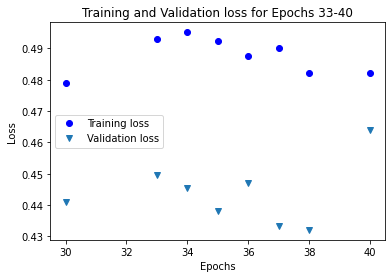

In [ ]:
# Plotting training history.
loss = ImageOnlyModel.history.history['loss']
val_loss = ImageOnlyModel.history.history['val_loss']
epochs = (33,34,35,36,37,38,30,40)
#epochs = range(10, len(loss) + 11)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'v', label='Validation loss')
plt.title('Training and Validation loss for Epochs 33-40')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Saving the model
#ImageOnlyModel.save('/content/drive/MyDrive/Coursework3/ResNetCheck/40epochs.h5')

# Loading
ImageOnlyModel = keras.models.load_model('/content/drive/MyDrive/Coursework3/ResNetCheck/40epochs.h5',compile = False)

Applying it on the test dataset to get predictions

In [ ]:
ImageOnlyModel.load_weights('/content/drive/MyDrive/Coursework3/ResNetCheck/41onwardsImageOnlyModel.02-0.42.h5')

In [ ]:
# Applying to the test set with a generator. 
test_generator.reset()

# Get probabilities
outputs = ImageOnlyModel.predict(test_generator)

Evaluate performance by calculating the MSE

In [ ]:
def mse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse1 = np.mean((y_true - y_pred)**2)
    return mse1

In [ ]:
error = mse(test_generator.labels, outputs)
print('The mean squared error over the test set is %.2f%%' % error)

## GradCam

In [ ]:
# The explainer. Gotten from https://keras.io/examples/vision/grad_cam/
def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    from tensorflow import keras
    import tensorflow as tf
    # First, we create a model that maps the input image to the activations
    # of the last conv layer. This layer is located at model.layers[1] as the
    # ResNet model is the first "layer" of the ImageOnlyModel. Modify as needed.
    last_conv_layer = model.layers[1].get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.layers[1].inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    regression_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = regression_input
    for layer_name in classifier_layer_names:
        try:
            x = model.get_layer(layer_name)(x)
        except:
            x = model.layers[1].get_layer(layer_name)(x)
    regression_model = keras.Model(regression_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute predictions
        top_class_channel = regression_model(last_conv_layer_output)

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the regression
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

In [ ]:
# Set the layers.
last_conv_layer_name = "conv5_block3_out"
classifier_layer_names =  ["flatten_1",
                           "dense_3",
                           "dropout_2",
                           "dense_4",
                           "dropout_3",
                           "dense_5",]

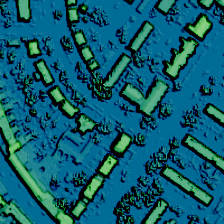

In [ ]:
# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Get the image in the right size
def get_img_array(img_path, size = (224, 224)):
    import tensorflow as tf
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    array = preprocess_input(array)
    return array

# Get an image
img_path1 = '/content/LIDAR/LIDAR_32610.png' 
img_path2 = '/content/LIDAR/LIDAR_48552.png'
img_path3 = '/content/LIDAR/LIDAR_21655.png'
img_path4 = '/content/LIDAR/LIDAR_21161.png'
img_path5 = '/content/LIDAR/LIDAR_55001.png'
img_path6 = '/content/LIDAR/LIDAR_58192.png'
img_path7 = '/content/LIDAR/LIDAR_6819.png'
img_path8 = '/content/LIDAR/LIDAR_50452.png'
img_path9 = '/content/LIDAR/LIDAR_44023.png'
img_path10 = '/content/LIDAR/LIDAR_35059.png'


data1 = get_img_array(img_path1)
data2 = get_img_array(img_path2)
data3 = get_img_array(img_path3)
data4 = get_img_array(img_path4)
data5 = get_img_array(img_path5)
data6 = get_img_array(img_path6)
data7 = get_img_array(img_path7)
data8 = get_img_array(img_path8)
data9 = get_img_array(img_path9)
data10 = get_img_array(img_path10)


# Plot it
display(Image(img_path10))

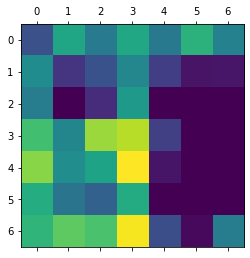

In [ ]:
# Plot the heatmap!
heatmap = make_gradcam_heatmap(
    preprocess_input(data10), ImageOnlyModel, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

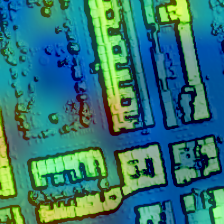

In [ ]:
# We load the original image
img = keras.preprocessing.image.load_img(img_path1)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "Image.png"
superimposed_img.save(save_path)

# Display Grad RAM
display(Image(save_path))


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py 
from colab_pdf import colab_pdf
colab_pdf('Coursewoork3-Submission.ipynb')

--2021-12-17 02:12:20--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-12-17 02:12:20 (26.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Coursewoork3-Submission.ipynb to pdf
[NbConvertApp] Support files will be in Coursewoork3-Submission_files/
[NbConvertApp] Making directory ./Coursewoork3-Submission_files
[NbConvertApp] Making directory ./Coursewoork3-Submission_files
[NbConvertApp] Making directory ./Coursewoork3-Submission_files
[NbCon

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'